# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [42]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [43]:
# Read and select variables
df_orig = pd.read_csv("supermarkets_data_enriched.csv")[['type',
                                                         'id',
                                                         'lat',
                                                         'lon',
                                                         'brand',
                                                         'shop',
                                                         'addr:city',
                                                         'addr:housenumber',
                                                         'addr:postcode',
                                                         'geometry',
                                                         'index_right',
                                                         'bfs_name',
                                                         'bfs_number',
                                                         'pop','pop_dens',
                                                         'frg_pct',
                                                         'emp']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
6,node,7389830915,47.225056,8.970650,Denner,supermarket,Uznach,15,8730.0,POINT (8.9706499 47.2250563),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
7,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,1,8001.0,POINT (8.5421608 47.3767316),77,Zürich,261,420217,4778.994655,32.458468,491193.0


### Group by brand

In [44]:
# Count the number of supermarkets per brand
df_orig['brand'].value_counts()

brand
Migros                                   335
Coop                                     174
Denner                                   142
Volg                                      68
VOI Migros Partner                        43
ALDI                                      39
Lidl                                      25
Aldi                                      25
Spar                                      19
Landi                                     15
Migros-Outlet                             11
Alnatura                                  11
VOI                                        4
Globus                                     2
ZWIBOL                                     1
Lidl Schweiz                               1
Jumbo                                      1
Rolog Krinner Cotub Titan Serac Molok      1
Name: count, dtype: int64

### Barchart with number of supermarkets per brand

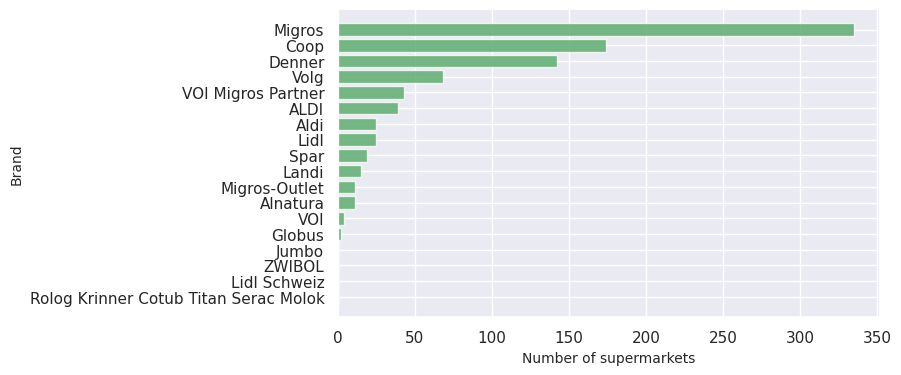

In [45]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df_orig['brand'].value_counts().sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of supermarkets', fontsize=10)
ax.set_ylabel('Brand', fontsize=10)

# Show graph
plt.show()

### Scatterplot matrix

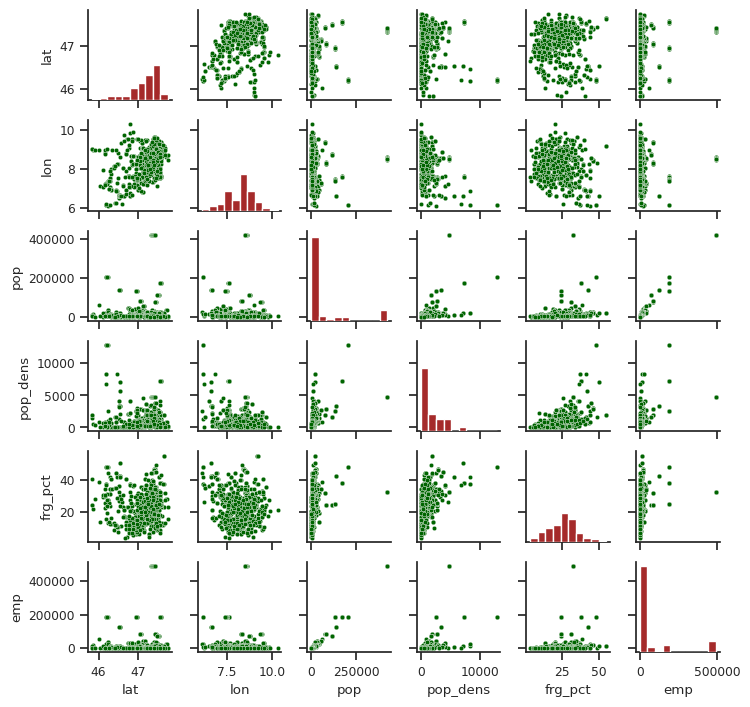

In [46]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df_orig[['lat', 
                          'lon',
                          'pop', 
                          'pop_dens',
                          'frg_pct',
                          'emp']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Plot for supermarket locations

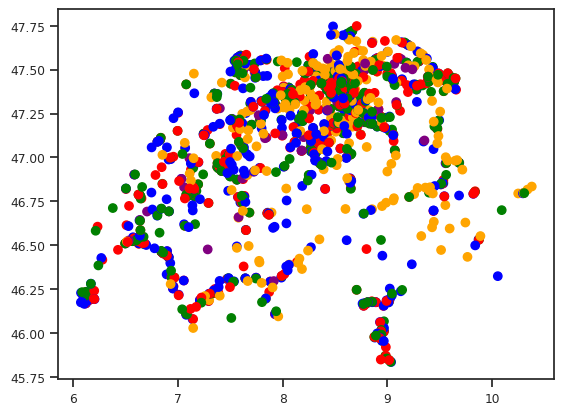

In [47]:
# Read and select variables
df = pd.read_csv("supermarkets_data_enriched.csv")[['id',
                                                         'brand',
                                                         'lat',
                                                         'lon',]]

# Subset
df_sub = df.loc[df['brand'].isin(['Migros', 'Coop', 'Denner', 'Volg', 'Landi'])]

# Colors
colors = {'Coop':'blue', 'Migros':'red', 'Denner':'green', 'Volg':'orange', 'Landi':'purple'}

# Plot
plt.scatter(df_sub['lon'],
            df_sub['lat'],
            c=df_sub['brand']
            .map(colors))

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [48]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-09 17:49:53
Python Version: 3.11.10
-----------------------------------
